In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 당별로 부정/긍정 빈도수 확인

In [69]:
df = pd.read_csv('./data/news_2016_긍정부정결과_BertTokenizer.csv')
# df = df[df['party_name'] != '코리아']

df

,party_content,party_name,label
0,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",무소속,LABEL_0
1,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",더불어민주당,LABEL_0
2,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",민주당,LABEL_0
3,"9%, 다음으로 문재인 더불어 대표(12",더불어민주당,LABEL_0
4,"9%, 다음으로 문재인 대표(12",민주당,LABEL_0
...,...,...,...
344510,"청주상당(더불어), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역...",더불어민주당,LABEL_0
344511,"청주상당(), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역 후보...",민주당,LABEL_0
344512,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, 더불...",더불어민주당,LABEL_0
344513,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, , ...",민주당,LABEL_0


In [70]:
df['label'].unique()

array(['LABEL_0', 'LABEL_1'], dtype=object)

In [71]:
df['label'] = df['label'].apply(lambda x: '긍정' if x == 'LABEL_1' else '부정')

In [72]:
df.head()

,party_content,party_name,label
0,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",무소속,부정
1,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",더불어민주당,부정
2,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",민주당,부정
3,"9%, 다음으로 문재인 더불어 대표(12",더불어민주당,부정
4,"9%, 다음으로 문재인 대표(12",민주당,부정


In [73]:
res_dic = {}


for party, label in zip(df['party_name'], df['label']):
    if party not in res_dic:
        res_dic[party] = {'긍정' : 0, '부정' : 0}
    else:
        res_dic[party][label] += 1

for party, counts in res_dic.items():
    print('당 : {}'.format(party))
    print('긍정 : {}'.format(counts['긍정']))
    print('부정 : {}'.format(counts['부정']))   

당 : 무소속
긍정 : 4306
부정 : 16682
당 : 더불어민주당
긍정 : 9968
부정 : 50432
당 : 민주당
긍정 : 11631
부정 : 55465
당 : 새누리당
긍정 : 24055
부정 : 65768
당 : 코리아
긍정 : 321
부정 : 29861
당 : 국민의당
긍정 : 11765
부정 : 46734
당 : 정의당
긍정 : 2798
부정 : 7760
당 : 기독자유당
긍정 : 53
부정 : 428
당 : 노동당
긍정 : 372
부정 : 493
당 : 복지국가당
긍정 : 199
부정 : 620
당 : 한나라당
긍정 : 1039
부정 : 465
당 : 민중연합당
긍정 : 475
부정 : 1008
당 : 공화당
긍정 : 294
부정 : 303
당 : 녹색당
긍정 : 195
부정 : 270
당 : 고용복지연금선진화연대
긍정 : 76
부정 : 93
당 : 한국국민당
긍정 : 47
부정 : 62
당 : 개혁국민신당
긍정 : 41
부정 : 21
당 : 기독당
긍정 : 9
부정 : 20
당 : 친반통일당
긍정 : 32
부정 : 52
당 : 대한민국당
긍정 : 6
부정 : 16
당 : 친반평화통일당
긍정 : 35
부정 : 19
당 : 일제·위안부·인권정당
긍정 : 1
부정 : 6
당 : 친반통합
긍정 : 35
부정 : 23
당 : 진리대한당
긍정 : 40
부정 : 27
당 : 통일한국당
긍정 : 40
부정 : 16
당 : 불교당
긍정 : 4
부정 : 8


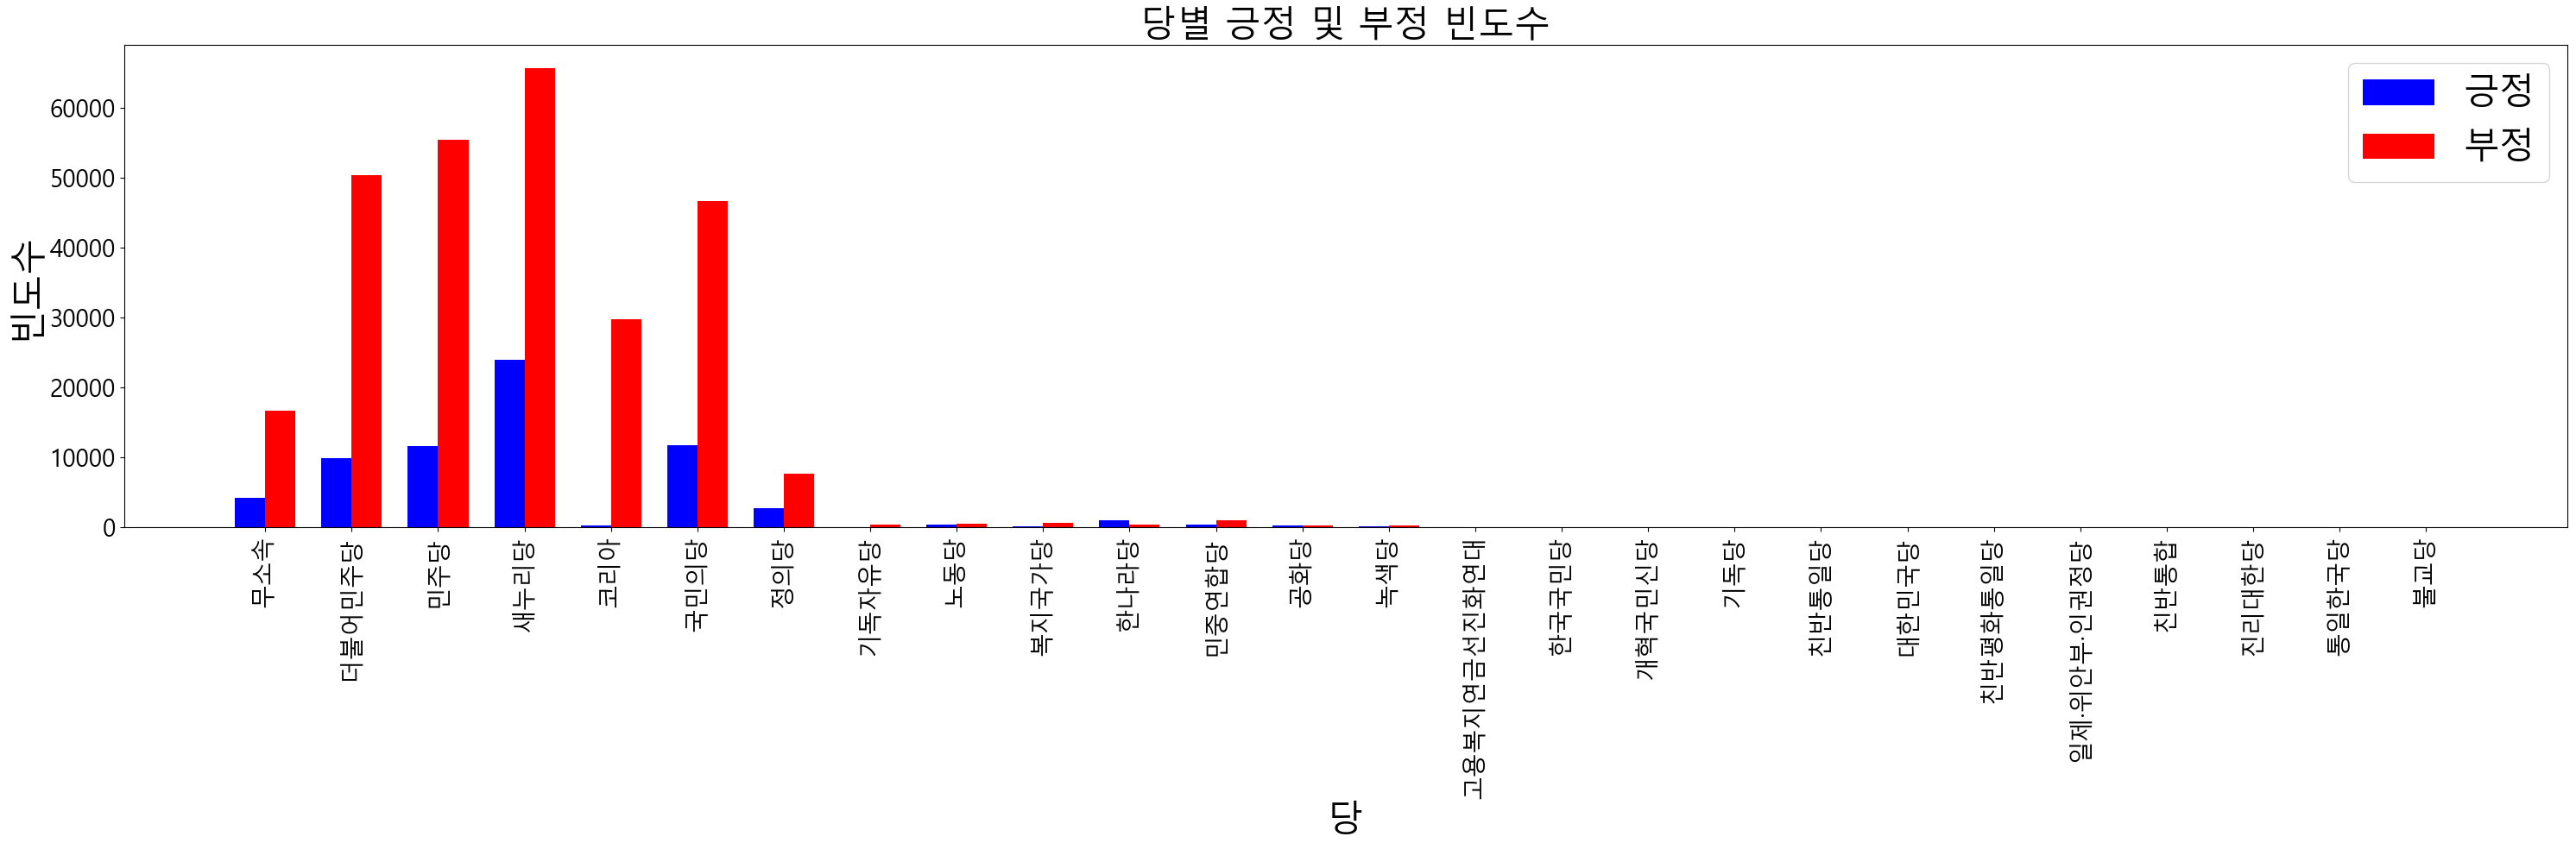

In [74]:
# 그래프를 그리기 위한 데이터 준비
parties = list(res_dic.keys())
positive_counts = [value['긍정'] for value in res_dic.values()]
negative_counts = [value['부정'] for value in res_dic.values()]

# 그래프 설정
bar_width = 0.35
index = np.arange(len(parties))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, positive_counts, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='부정', color='red', align='center')
plt.yticks(fontsize=20)

# 당 이름을 x축에 표시
plt.xlabel('당', fontsize = 30)
plt.ylabel('빈도수', fontsize = 30)
plt.title('당별 긍정 및 부정 빈도수', fontsize = 30)
plt.xticks(index + bar_width / 2, parties, rotation = 90, fontsize = 20)

# 범례 표시
plt.legend(fontsize = 30)

# 그래프 출력
plt.tight_layout()

In [75]:
num_df = pd.DataFrame(res_dic).T

print(num_df.shape)
num_df

(26, 2)


,긍정,부정
무소속,4306,16682
더불어민주당,9968,50432
민주당,11631,55465
새누리당,24055,65768
코리아,321,29861
국민의당,11765,46734
정의당,2798,7760
기독자유당,53,428
노동당,372,493
복지국가당,199,620


# 당선 여부 확인

In [76]:
res_df = pd.read_csv('./data/news_2016_당선명결과.csv')
res_df

,name,party
0,강길부,무소속
1,강병원,새누리당
2,강석진(姜錫振),새누리당
3,강석호(姜碩鎬),새누리당
4,강창일,더불어민주당
...,...,...
164,추혜선,정의당
165,표창원,더불어민주당
166,하태경,새누리당
167,한선교,새누리당


In [77]:
res_gb = res_df.groupby(['party']).count().reset_index()

res_gb

,party,name
0,국민의당,12
1,더불어민주당,81
2,무소속,4
3,바른미래당,1
4,새누리당,67
5,자유한국당,2
6,정의당,2


In [78]:
# 부정 긍정 빈도수

num_df = num_df.reset_index()
num_df.columns = [['party', 'pos', 'neg']]
num_df.head()

,party,pos,neg
0,무소속,4306,16682
1,더불어민주당,9968,50432
2,민주당,11631,55465
3,새누리당,24055,65768
4,코리아,321,29861


In [79]:
# 멀티 인덱스 삭제

num_df.columns = num_df.columns.get_level_values(0)
num_df.columns

Index(['party', 'pos', 'neg'], dtype='object')

In [80]:
# 빈도수, 당선 수
num_res_df = pd.merge(res_gb, num_df, on = 'party', how = 'right')
num_res_df.fillna(0, inplace = True)
num_res_df.columns = [['party', 'res', 'pos', 'neg']]
num_res_df.columns = num_res_df.columns.get_level_values(0)
num_res_df = num_res_df.sort_values('res', ascending = False)
num_res_df = num_res_df.reset_index(drop = True)

num_res_df

,party,res,pos,neg
0,더불어민주당,81.0,9968,50432
1,새누리당,67.0,24055,65768
2,국민의당,12.0,11765,46734
3,무소속,4.0,4306,16682
4,정의당,2.0,2798,7760
5,한국국민당,0.0,47,62
6,통일한국당,0.0,40,16
7,진리대한당,0.0,40,27
8,친반통합,0.0,35,23
9,일제·위안부·인권정당,0.0,1,6


In [81]:
num_res_df.to_csv('./data/news_2016_당선_결과.csv', index = False)

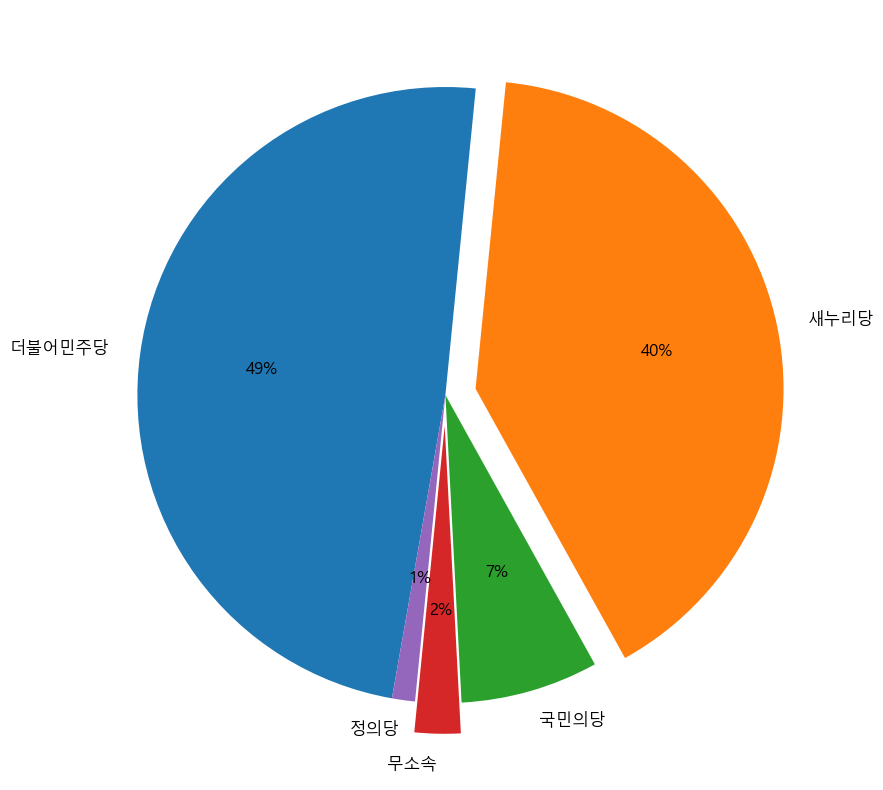

In [66]:
df = num_res_df[:5]

ratio = list(df['res'].values)
labels = list(df['party'].values)
explode = [0, 0.10, 0, 0.10, 0]

plt.figure(figsize = (10, 10))
plt.rcParams.update({'font.size': 12})  # 원하는 폰트 크기로 변경
plt.pie(ratio, labels = labels, startangle=260, autopct='%1.0f%%', counterclock = False, explode = explode);

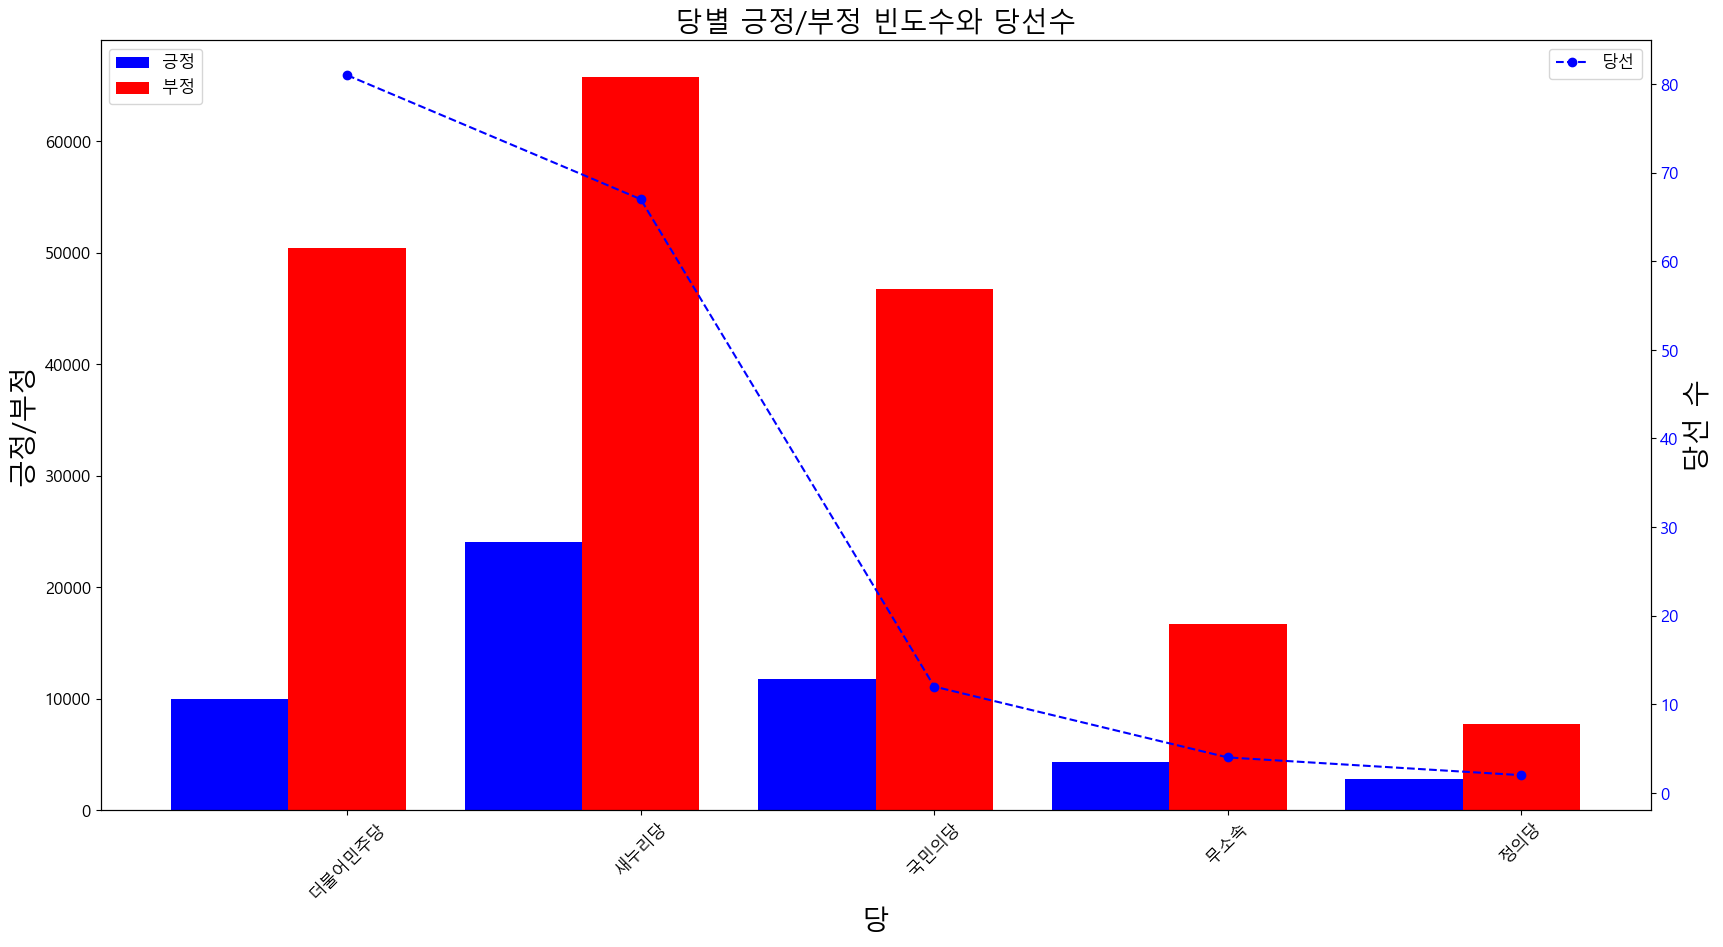

In [67]:
# 2중 그래프

fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot() # bar 그래프


# bar 그래프 그리기
bar_width = 0.4
index = np.arange(len(df))
ax1.set_xticks(index);
ax1.set_xticklabels(df['party']);
ax1.bar(index - bar_width, df['pos'], bar_width, color = 'blue', label = '긍정')
ax1.bar(index, df['neg'], bar_width, color = 'red', label = '부정');
plt.xticks(rotation = 45);
plt.xlabel('당', fontsize = 20);
plt.ylabel('긍정/부정', fontsize = 20);
ax1.legend(loc = 'upper left');

# 선 그래프 그리기
ax2 = ax1.twinx();
ax2.plot(index, df['res'], color='b', linestyle='--', marker = 'o', label = '당선');
ax2.tick_params(axis = 'y', labelcolor = 'b');
plt.ylabel('당선 수', fontsize = 20);
ax2.legend();
plt.title('당별 긍정/부정 빈도수와 당선수', fontsize=20);